# ESSAOURI Hafsa


# Prediction Using Supervised ML



## 1. import Libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 2. Dataset

In [47]:
#reading data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
#print data
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### the dataset does not contain null values


## 3. descriptive statistics

In [65]:
df.describe(include = 'all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 4. Plotting the distribution

Text(0, 0.5, 'Scores')

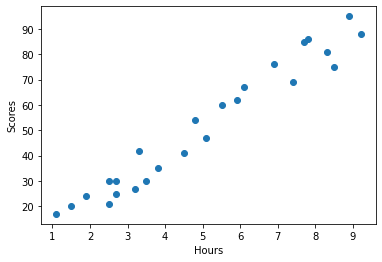

In [66]:
x = df['Hours'].values
y = df['Scores'].values
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('Scores')

#### As we can see, when the variable 'Scores' increases, 'Hours' increases too. So we have a positive correlation.

## 5. Training phase

In [84]:
X=df.iloc[:,:-1].values
#Y : target vector
Y=df.iloc[:,-1].values

In [85]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [86]:
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [87]:
X.shape

(25, 1)

In [45]:
Y = Y.reshape(Y.shape[0],1)
Y.shape

(25, 1)

In [55]:
#train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.0/3)

## 6. Model

In [59]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

## 7. Comparing actual scores to predicted ones


In [102]:
Y_pred = model.predict(X_test)

In [103]:
Y_pred

array([63.16248469, 21.2695566 , 29.24916195, 61.16758335, 47.20327399,
       57.17778067, 53.187978  , 87.10130073, 34.2364153 ])

In [104]:
#Comparing test scores to predicted ones
pd.DataFrame({'test Scores' : Y_test, 'predicted Scores' : Y_pred})

,test Scores,predicted Scores
0,67,63.162485
1,24,21.269557
2,30,29.249162
3,62,61.167583
4,41,47.203274
5,60,57.177781
6,47,53.187978
7,75,87.101301
8,27,34.236415


## 8. visualization of results


Text(0.5, 1.0, 'Evolution of scores per hours studied')

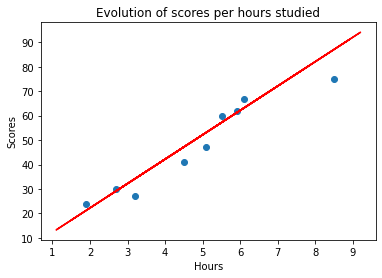

In [108]:
plt.scatter(X_test,Y_test)
plt.plot(X_train, model.predict(X_train), c='r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Evolution of scores per hours studied')

## 9. Predict Score if a student studies for 9.25hrs/day

In [110]:
no_hours = 9.25
predicted_score = model.predict([[no_hours]])
print("Number of study hours {}".format(no_hours))
print("Predicted Score is : {}".format(predicted_score[0]))

Number of study hours 9.25
Predicted Score is : 94.58218074707402


#### the Score if a student studies for 9.25h/day is : 94.58218075

## 10. Evaluating model performance

In [112]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.744711194524819
